# Building "Hydrosense" through Analytical Models

Very soon, we will begin using computational tools to solve groundwater flow problems and analyze the results of their predictions. With complex groundwater flow models, there are many ways that one can get the wrong answer (some have argued, indeed, that ["all models are wrong"](https://en.wikipedia.org/wiki/All_models_are_wrong). As a modeler, its your job to avoid the most eggregious ways of being wrong, and to be clear about how uncertainties or assumptions may contribute to errors in your model.

Examples of things that can make a model wrong include (in rough order from most eggregious to least):
* **User Error**: A parameter of the model (such as a recharge rate, or hydraulic conductivity) is incorrectly specified, impacting model results.
* **Numerical Error**: The solution to the numerical version of your model is impacted by solver issues such as convergence
* **Discretization Error**: The solution to the numerical version of your problem is impacted by the size of spatial or temporal discretizations used
* **Conceptual Error in Physical Approximations**: The results of the model do not represent the physical processes that are important in the real-world system
* **Conceptual Error in Geometry Specifications**: The results of the model are impacted by incorrect specifications of internal or external boundaries. For example, you assume that a low-permeability clay layer is continuous when it is not.

Analytical models, that is, those that result from a direct calculus-style solution, are generally only possible to derive for simplified geometries (e.g., the "spherical cow", the circular island). However, because their results are exact, they provide useful test-cases for comparing against numerical models. Similarly, the results of an analytical solution often provide clues about the relative importance of different processes. In this notebook we will explore several different analytical solutions and how the interpretation of their results can be used to provide some evidence that numerical results are trustworthy. 


## Learning Objectives

After you have completed running and reading this notebook, you should be able to:
* 123

# Initial Setup

In [2]:
#When working with files, it is always a good idea to import os, which allows you to be computer-agnostic
import os

#To create basic animations (by repeatedly changing a figure), these internal subroutines of iPython must be imported
from IPython.display import clear_output, display

#Any type of plot that involves matrices will end up needing NumPy
import numpy as np
#Import the plotting libraries of Matplotlib (the most commonly used routines)
import matplotlib.pyplot as plt

# 1-D Problem Solutions

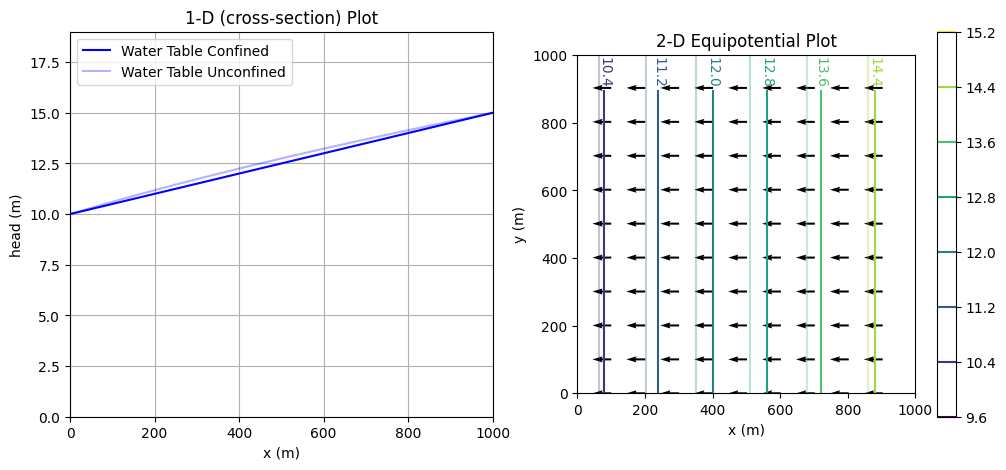

In [85]:
#Assumptions:
#Steady-state
#1-D (x-direction flow)
#Homogeneous
#Confined (Constant saturated thickness)
#Added solution for unconfined

Lx = 1000
Ly = 1000
h1 = 10
C = 1.5
h2 = C*h1
K = 10
numx = 300
numy = 300

x = np.linspace(0,Lx,numx)
y = np.linspace(0,Ly,numy)
xm,ym = np.meshgrid(x,y)

h1D_c = h1*((C-1)*(x/Lx) + 1)
h1Dmax_c = np.max(h1D_c)
h2D_c = h1*((C-1)*(xm/Lx) + 1)
h2Dmax_c = np.max(h2D_c)
qx2D_c = -K*A_c*np.ones(np.shape(xm))
qy2D_c = 0*np.ones(np.shape(xm))

A_un = (h2**2 - h1**2)/Lx
B_un = h1**2
h1D_un = np.sqrt((A_un*x + B_un))
h1Dmax_un = np.max(h1D_un)
h2D_un = np.sqrt((A_un*xm + B_un))
h2Dmax_un = np.max(h2D_un)
qx2D_un = -K*A_un/(np.sqrt(A_un*xm + B_un))
qy2D_un = 0*np.ones(np.shape(xm))

sl = slice(None,None,30)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#Produce two visualizations: 
#Cross-section with water table (1-D), and 
#Equipotential map (2-D) 
axes[0].plot(x, h1D_c, "b",label="Water Table Confined")
axes[0].plot(x, h1D_un, "b",label="Water Table Unconfined",alpha=0.3)

axes[0].set_xlabel("x (m)")
axes[0].set_ylabel("head (m)")
axes[0].set_title("1-D (cross-section) Plot")
axes[0].legend(loc='upper left')
axes[0].set_ybound(0,h1Dmax_c+4)
axes[0].set_xbound(0,Lx)
axes[0].grid(visible=True)

cn_c = axes[1].contour(xm, ym, h2D_c)
cn_un = axes[1].contour(xm, ym, h2D_un,alpha=0.3)
axes[1].clabel(cn_c)
axes[1].quiver(xm[sl,sl],ym[sl,sl],qx2D_c[sl,sl],qy2D_c[sl,sl])
axes[1].set_xlabel("x (m)")
axes[1].set_ylabel("y (m)")
axes[1].set_title("2-D Equipotential Plot")
axes[1].set_ybound(0,Ly)
axes[1].set_xbound(0,Lx)
axes[1].set_aspect("equal")

cb = fig.colorbar(cn_c, ax=axes[1])


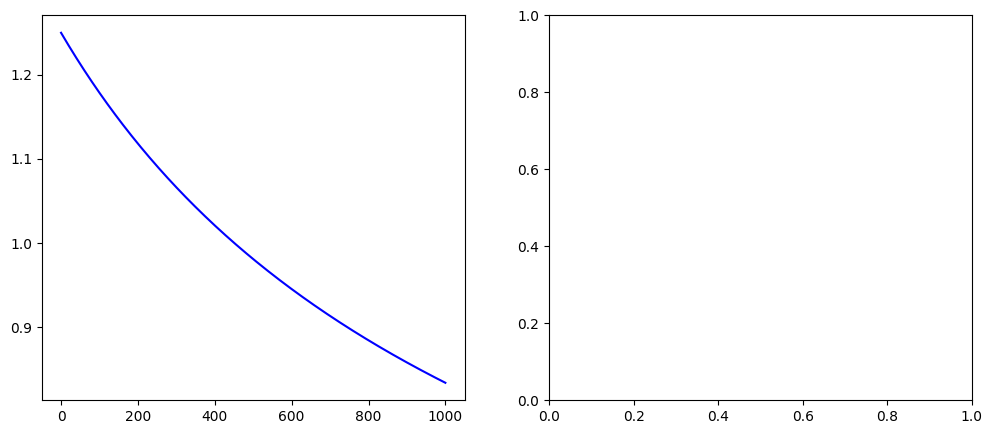

In [86]:
#error check

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

qx_mult = (C+1)/(2*((C**2 - 1)*(x/Lx)+1)**(1/2))
axes[0].plot(x, qx_mult, "b",label="Multiplier % error")


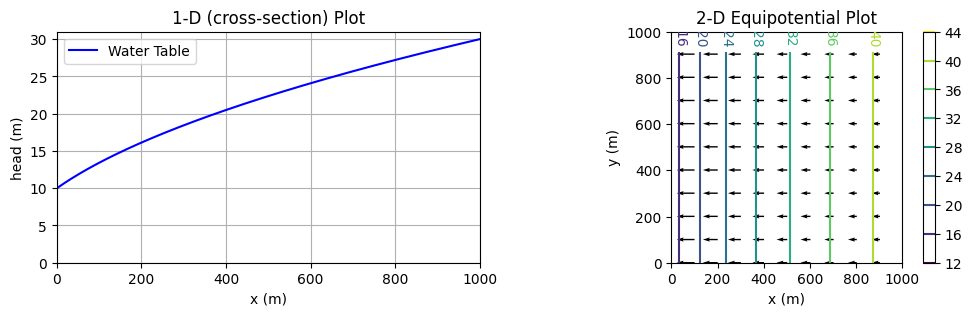

In [74]:
#Assumptions:
#Steady-state
#1-D (x-direction flow)
#Homogeneous
#Unconfined (Variable saturated thickness)

Lx = 1000
Ly = 1000
h1 = 10
C = 3
h2 = C*h1
K = 10
numx = 300
numy = 300

x = np.linspace(0,Lx,numx)
y = np.linspace(0,Ly,numy)
xm,ym = np.meshgrid(x,y)

A_un = (h2**2 - h1**2)/Lx
B_un = h1**2
h1D = np.sqrt((A_un*x + B_un))
h1Dmax = np.max(h1D)

h2D = np.sqrt(2*(A_un*xm + B_un))
h2Dmax = np.max(h2D)

qx2D_un = -K*A_un/(np.sqrt(A_un*xm + B_un))
qy2D_un = 0*np.ones(np.shape(xm))

fig, axes = plt.subplots(1, 2, figsize=(12, 3))

#Produce two visualizations: 
#Cross-section with water table (1-D), and 
#Equipotential map (2-D) 
axes[0].plot(x, h1D, "b",label="Water Table")
axes[0].set_xlabel("x (m)")
axes[0].set_ylabel("head (m)")
axes[0].set_title("1-D (cross-section) Plot")
axes[0].legend(loc='upper left')
axes[0].set_ybound(0,h1Dmax+1)
axes[0].set_xbound(0,Lx)
axes[0].grid(visible=True)

cn = axes[1].contour(xm, ym, h2D)
axes[1].quiver(xm[sl,sl],ym[sl,sl],qx2D_un[sl,sl],qy2D_un[sl,sl])

axes[1].clabel(cn)
axes[1].set_xlabel("x (m)")
axes[1].set_ylabel("y (m)")
axes[1].set_title("2-D Equipotential Plot")
axes[1].set_ybound(0,Ly)
axes[1].set_xbound(0,Lx)
axes[1].set_aspect("equal")

cb = fig.colorbar(cn, ax=axes[1])

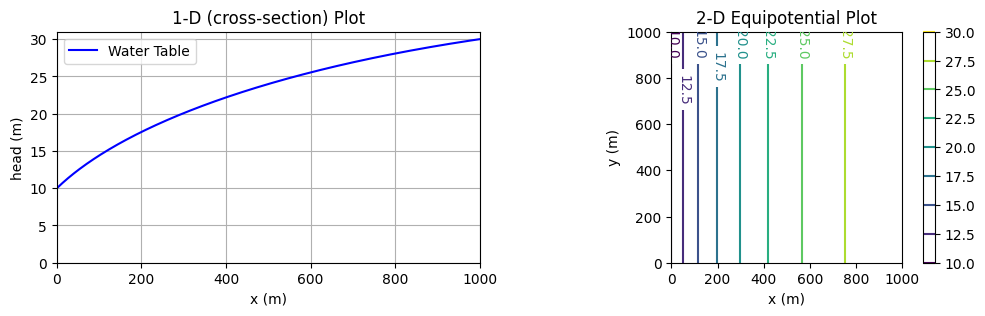

In [77]:
#Assumptions:
#Steady-state
#1-D (x-direction flow)
#Homogeneous
#Unconfined (Variable saturated thickness)
#With recharge

Lx = 1000
Ly = 1000
h1 = 10
C = 3
h2 = C*h1
N = 0.003
K = 10
numx = 300
numy = 300

x = np.linspace(0,Lx,numx)
y = np.linspace(0,Ly,numy)
xm,ym = np.meshgrid(x,y)

C1 = ((1/2)*h2**2 - (1/2)*h1**2 + (N/(2*K)*Lx**2))/Lx
C2 = (1/2)*h1**2
h1D = np.sqrt(2*(-(N/(2*K))*x**2 + C1*x + C2))
h1Dmax = np.max(h1D)

h2D = np.sqrt(2*(-(N/(2*K))*xm**2 + C1*xm + C2))
h2Dmax = np.max(h2D)

fig, axes = plt.subplots(1, 2, figsize=(12, 3))

#Produce two visualizations: 
#Cross-section with water table (1-D), and 
#Equipotential map (2-D) 
axes[0].plot(x, h1D, "b",label="Water Table")
axes[0].set_xlabel("x (m)")
axes[0].set_ylabel("head (m)")
axes[0].set_title("1-D (cross-section) Plot")
axes[0].legend(loc='upper left')
axes[0].set_ybound(0,h1Dmax+1)
axes[0].set_xbound(0,Lx)
axes[0].grid(visible=True)

cn = axes[1].contour(xm, ym, h2D)
axes[1].clabel(cn)
axes[1].set_xlabel("x (m)")
axes[1].set_ylabel("y (m)")
axes[1].set_title("2-D Equipotential Plot")
axes[1].set_ybound(0,Ly)
axes[1].set_xbound(0,Lx)
axes[1].set_aspect("equal")

cb = fig.colorbar(cn, ax=axes[1])

/var/folders/qk/f3wykhx514z39hxflxx5g66m0000gn/T/ipykernel_6623/305223323.py:22: RuntimeWarning: divide by zero encountered in log
  h1D = (np.sqrt(2*((Q/(2*np.pi*K))*np.log(r) - N/(4*K)*r**2 + C1)))*(r < risle) + (h_risle*(r >= risle))
/var/folders/qk/f3wykhx514z39hxflxx5g66m0000gn/T/ipykernel_6623/305223323.py:22: RuntimeWarning: invalid value encountered in sqrt
  h1D = (np.sqrt(2*((Q/(2*np.pi*K))*np.log(r) - N/(4*K)*r**2 + C1)))*(r < risle) + (h_risle*(r >= risle))


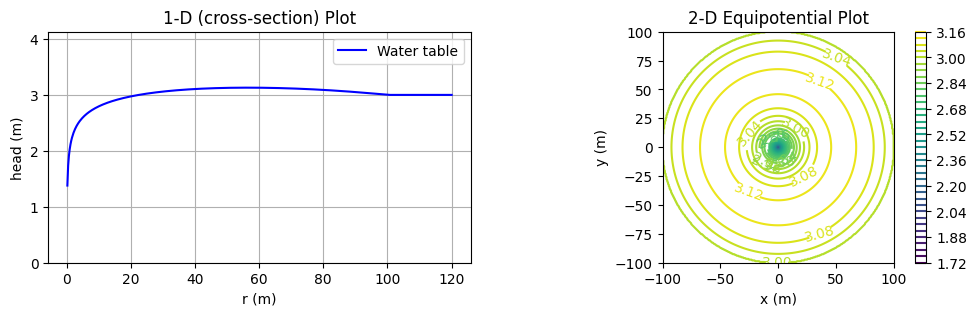

In [63]:
Lx = 100
Ly = 100
risle = 100
h_risle = 3
Q = 50
N = 0.005 #0.005
K = 10
numx = 300
numy = 300

Lr = 120
numr = 500

r = np.linspace(0,Lr,numr)

x = np.linspace(-Lx,Lx,numx)
y = np.linspace(-Ly,Ly,numy)
xm,ym = np.meshgrid(x,y)
rm = np.sqrt(xm**2 + ym**2)

C1 = (1/2)*h_risle**2 - Q/(2*np.pi*K)*np.log(risle) + (N/(4*K))*risle**2
h1D = (np.sqrt(2*((Q/(2*np.pi*K))*np.log(r) - N/(4*K)*r**2 + C1)))*(r < risle) + (h_risle*(r >= risle))
h1Dmax = np.nanmax(h1D)

h2D = np.sqrt(2*((Q/(2*np.pi*K))*np.log(rm) - N/(4*K)*rm**2 + C1))*(rm < risle) + (h_risle*(rm >= risle))
h2Dmax = np.nanmax(h2D)


fig, axes = plt.subplots(1, 2, figsize=(12, 3))

#Produce two visualizations: 
#Cross-section with water table (1-D), and 
#Equipotential map (2-D) 
axes[0].plot(r, h1D, "b",label="Water table")
axes[0].set_xlabel("r (m)")
axes[0].set_ylabel("head (m)")
axes[0].set_title("1-D (cross-section) Plot")
axes[0].legend(loc='upper right')
axes[0].set_ybound(0,h1Dmax+1)
#axes[0].set_xbound(0,Lx)
axes[0].grid(visible=True)

cn = axes[1].contour(xm, ym, h2D, 40)
axes[1].clabel(cn)
axes[1].set_xlabel("x (m)")
axes[1].set_ylabel("y (m)")
axes[1].set_title("2-D Equipotential Plot")
axes[1].set_ybound(-Ly,Ly)
axes[1].set_xbound(-Lx,Lx)
axes[1].set_aspect("equal")

cb = fig.colorbar(cn, ax=axes[1])


## Other plot types within axes

There are many useful methods for plotting different types of data using Matplotlib. The code below demonstrates a few of these. For a complete listing of all plot types, see [the Matplotlib Plot Types page](https://matplotlib.org/stable/plot_types/).

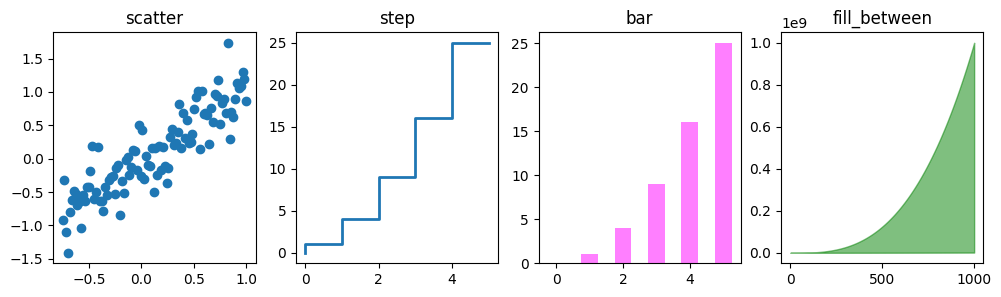

In [3]:
xx = np.linspace(-0.75, 1.0, 100)
n = np.array([0, 1, 2, 3, 4, 5])

fig, axes = plt.subplots(1, 4, figsize=(12, 3))

axes[0].scatter(xx, xx + 0.25 * np.random.randn(len(xx)))
axes[0].set_title("scatter")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")

axes[2].bar(n, n**2, align="center", width=0.5, color="#ff00ff", alpha=0.5)
axes[2].set_title("bar")

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5)
axes[3].set_title("fill_between");

## Tailoring plot visuals and Exporting

As seen above, different options can be used to set the scale of the figure, the properties of axes, and  how a plot element will appear (such as the color, marker style, line width, etc.). There are multiple ways to do this and different coders like different approaches.

**Tailoring Figures**: Setting figure properties is easiest (and most often done) at the time of `figobj` creation. Use Shift-Tab within the `plt.figure()` command to see potential options. Otherwise, `fig.set_*` commands can be used to set individual properties.

**Tailoring Axes**: Setting axis options tends to be iterative and is often done after `axisobj` creation, using `ax.set_*` commands.

**Tailoring Plot Elements**: Setting how a plot element (line, bar graph, etc.) displays is usually done at the time of plot element creation, as shown in the examples above

The examples below demonstrate a few of the methods and variables that can be used to set plot and axis properties. To explore further options in greater depth, choose one of the functions used below and use `Shift-Tab` to see properties that may be set, or use tab completion on any of the objects to see associated methods.

When you have created your first professionally-tailored plot, you'll probably want to export it and share it with friends (or your journal editor). This is easy using a figure object's `savefig` method.

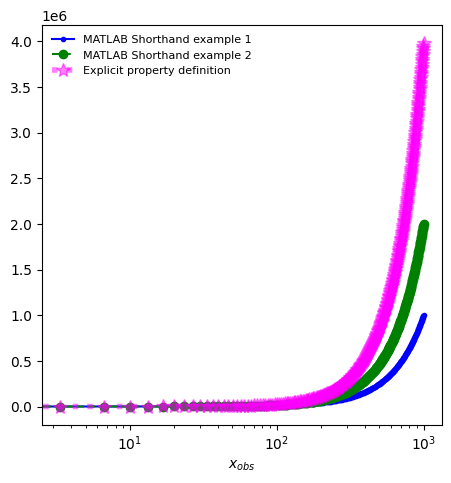

In [4]:
#Create a figure, specifying the size at time of creation
fig = plt.figure(figsize=(5,5), dpi=100)
#Post-hoc setting of figure properties (less common)
#fig.set_dpi(300)

#Create an axes, specifying options at time of creation
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8],xlabel="$x_{obs}$",xscale="log")
#Post-hoc setting of axis properties (more common)
#ax.grid(visible=True)
#ax.set_yscale("log")
#ax.set_xlim(2,10)

#A series of characters can be used to specify color, marker type, and line type for basic operations
ax.plot(x, x**2, "b.-",label="MATLAB Shorthand example 1")
ax.plot(x, x**2.1, "go--",label="MATLAB Shorthand example 2")

#For more granular changes, different properties can be used to control the display of a plot object
#explicitly.
pl = ax.plot(
    x,
    x**2.2, 
    color="#ff00ff", 
    linewidth=4, 
    linestyle=":", 
    marker="*", 
    markersize=10, 
    alpha=0.5,
    label="Explicit property definition"
)

#Legend properties are generally set at legend creation
ax.legend(fontsize=8,frameon=False)

#Post-hoc setting of plot object properties.
#If a variable is declared when the plot is created, that variable may contain an array of objects 
#where properties for each object can be set. This tends to be more cumbersome.
#Try the examples below
#pl[0].set_color('g')
#pl[0].set_alpha(0.2)

output_name = os.path.join('.','nboutput','myprettyfig.png')
fig.savefig(output_name)

# 2-D Plots

Creating 2-D plots requires first setting up a 2-D `meshgrid` of points in (x,y) at which to calculate a function, and then evaluating the function over all x,y points.

## Plotting 2-D Scalar fields

Most 2-D plots for visualizing field variables rely on a colormap to convey information about the function's value. See the [Matplotlib documentation on different colormaps](https://matplotlib.org/stable/users/explain/colors/colormaps.html) for help with finding a colormap for your application. Named colormaps can be looked up under `plt.cm.`.

An alternative to mapping field variables is to use a rendered 3-D plot, though the detail visible in this plot will depend on arbitrary choices such as the camera angle. Matplotlib support exists for some 3-D plot types, but in current experience it is more buggy than 2-D plot types.

Text(0.5, 0.92, 'plot_surface')

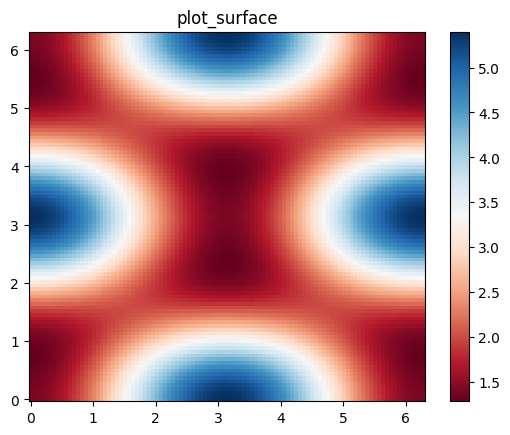

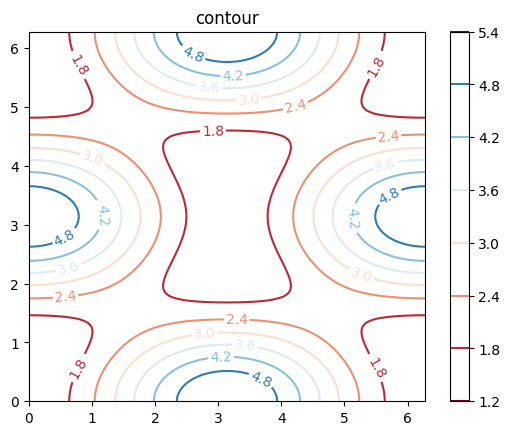

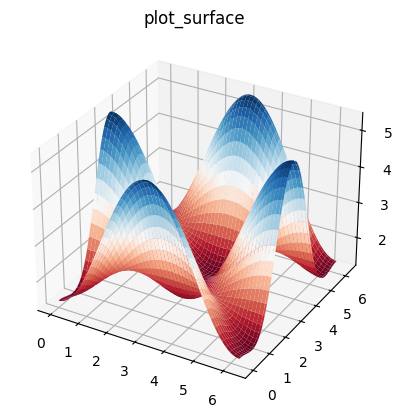

In [5]:
#Setup the "mesh" of points on which to evaluate a function
xl = np.linspace(0, 2 * np.pi, 100)
yl = np.linspace(0, 2 * np.pi, 100)
X, Y = np.meshgrid(xl,yl)

#Evaluate the function Z at all points in the mesh
alpha = 0.7
phi_ext = 2 * np.pi * 0.5
Z = 2 + alpha - 2*np.cos(Y)*np.cos(X) - alpha * np.cos(phi_ext - 2 * Y)

#Demonstration of the pcolor plot type
fig1, ax1 = plt.subplots()
p = ax1.pcolor(
    X,
    Y,
    Z,
    cmap=plt.cm.RdBu,
    vmin=Z.min(),
    vmax=Z.max(),
)
cb = fig1.colorbar(p, ax=ax1)
ax1.set_title('plot_surface')

#Demonstration of the contour plot type
fig2, ax2 = plt.subplots()
cn = plt.contour(
    X,
    Y,
    Z,
    cmap=plt.cm.RdBu,
    vmin=abs(Z).min(),
    vmax=abs(Z).max(),
)
ax2.clabel(cn)
cb = fig2.colorbar(cn, ax=ax2)
ax2.set_title('contour')

#Demonstration of the 3-D plot_surface plot type
fig3, ax3 = plt.subplots(subplot_kw={"projection": "3d"})
ax3.plot_surface(X, Y, Z, cmap=plt.cm.RdBu)
ax3.set_title('plot_surface')

## Plotting 2-D Vector Fields

As described in the Math Preliminaries, vector field variables represent a vector quantity that changes with space. For example, the gradient (the direction and rate of steepest ascent) of the surface plotted above changes with location. 

Vector fields can be plotted using the `quiver` statement. Do demonstrate this capability, we plot the surface from the prior example as a contour map and the calculated gradient as a quiver plot. Note that lines of equal value (contours) are perpendicular to the quiver arrows, when plotted with equal scaling for the x and y axes

Text(0.5, 1.0, 'Contour with quiver for gradient')

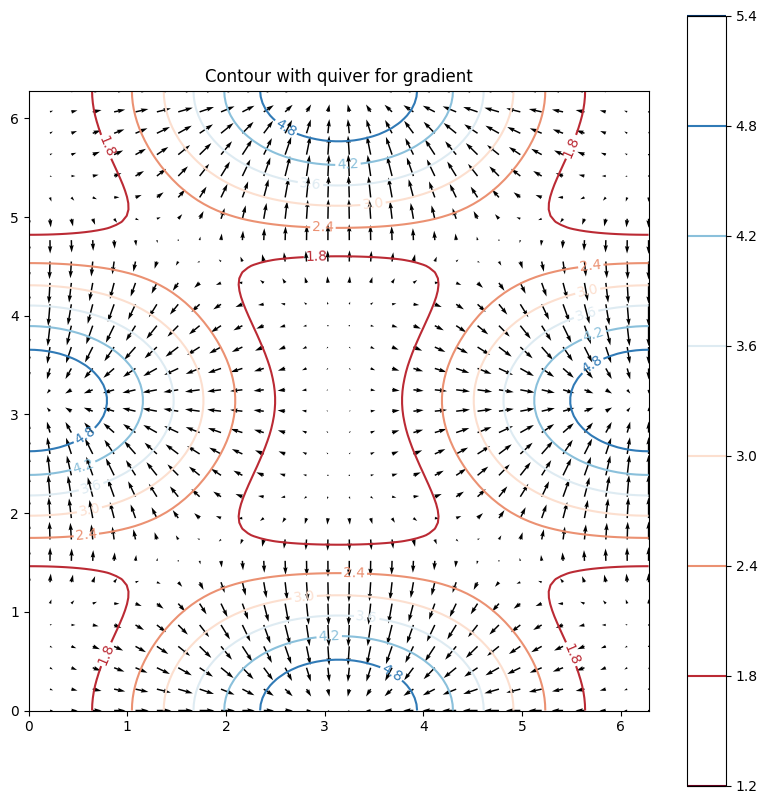

In [6]:
fig, ax = plt.subplots(figsize=(10,10))
cn = plt.contour(
    X,
    Y,
    Z,
    cmap=plt.cm.RdBu,
    vmin=abs(Z).min(),
    vmax=abs(Z).max(),
)
ax.clabel(cn)
cb = fig.colorbar(cn, ax=ax)

nq = 30
xq = np.linspace(0, 2*np.pi, nq)
yq = np.linspace(0, 2*np.pi, nq)
XQ, YQ = np.meshgrid(xq,yq)

DZDX = 2*np.cos(YQ)*np.sin(XQ)
DZDY = 2*np.sin(YQ)*np.cos(XQ) - 2*alpha*np.sin(phi_ext - 2*YQ)

ax.quiver(XQ,YQ,DZDX,DZDY)
ax.set_aspect('equal')
ax.set_title('Contour with quiver for gradient')

# Check-in Activity

In the coming weeks we will look at a few analytical solutions to the groundwater flow equation and demonstrate how they can produce some insights for testing and verifying our numerical models.

One such 2-D solution to the groundwater flow equation in a confined aquifer is:

$h(x,y) = \frac{Q}{4 \pi T} ln \left( \sqrt{(x - 10)^2 + y^2} \right) - R_x x + h_0$

where $x$,$y$ and $h$ have units of $[m]$, $Q$ has units of $[m^3/s]$, $T$ has units of $[m^2/s]$, $R_x$ is unitless, and $h_0$ has units of $[m]$

To test out what you've learned above, create a plot with the following setup:
* Plot over the range $x = [-150m, 150m]$, $y = [-150m, 150m]$
* Use values of $Q=1\times10^{-3} [m^3/s]$, $R_x=1\times10^{-3}$, $T=4\times10^{-3} [m^3/s]$, and $h_0=20[m]$
* Contour between $h = 19.9m$ and $h = 20.5m$, using a contour interval of $0.01m$

Bonus: Add a quiver plot using the (depth integrated) discharges of: 

$q_x = -T \frac{\partial h}{\partial x}$ and

$q_y = -T \frac{\partial h}{\partial y}$
